In [ ]:
# Import libraries
import math
import pandas_datareader as web
import  numpy as np
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirthyeight')

In [ ]:
# description: this program uses an artificial neural network called lon short Term Memory (LSTM)
#           to prsedict the closing stock price of corporation(Apple Inc.) using the past 60 day stock price.

In [11]:
pip install tensorflow

     |████████████████████████████████| 394.4 MB 1.8 kB/s eta 0:00:01    |███████▋                        | 94.2 MB 1.9 MB/s eta 0:02:41     |████████                        | 97.9 MB 3.5 MB/s eta 0:01:24     |█████████▌                      | 116.6 MB 727 kB/s eta 0:06:22     |█████████▊                      | 119.5 MB 411 kB/s eta 0:11:08     |█████████████████▍              | 214.1 MB 1.1 MB/s eta 0:02:38
     |████████████████████████████████| 462 kB 338 kB/s eta 0:00:01
     |████████████████████████████████| 42 kB 143 kB/s eta 0:00:01
     |████████████████████████████████| 57 kB 455 kB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 518 kB/s eta 0:00:01
     |████████████████████████████████| 3.8 MB 743 kB/s eta 0:00:01
     |████████████████████████████████| 65 kB 317 kB/s eta 0:00:01
     |████████████████████████████████| 129 kB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 10.6 MB 213 kB/s eta 0:00:01    |█████████████████████████████▌  | 9.8 MB 1

In [7]:
#Get the stock quote
df  = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2021-04-02')
#Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.650659
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.718646
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.859850
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.994284
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.973674
...,...,...,...,...,...,...
2021-03-26,121.480003,118.919998,120.349998,121.209999,93958900.0,121.209999
2021-03-29,122.580002,120.730003,121.650002,121.389999,80819200.0,121.389999
2021-03-30,120.400002,118.860001,120.110001,119.900002,85671900.0,119.900002


In [8]:
#Get the number of row and columns in data set
df.shape

(2327, 6)

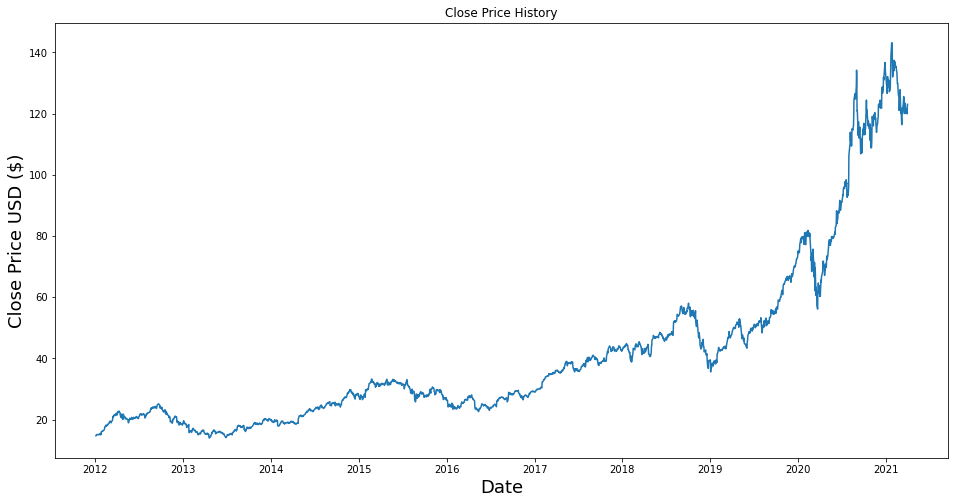

In [14]:
#visualize the closing price history
plt.figure(figsize=(16, 8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [15]:
#Creating a new dataframe with only the 'Close column'
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len


1862

In [17]:
#Scale the data before entered in neural network
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
    
scaled_data

array([[0.00572147],
       [0.00633231],
       [0.00760099],
       ...,
       [0.81998644],
       [0.83739962],
       [0.84397792]])

In [20]:
#Create the training data set
#Create the scaled the training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.00572147, 0.00633231, 0.00760099, 0.00880885, 0.00862367,
       0.00904103, 0.00885031, 0.00852969, 0.00809297, 0.00944457,
       0.0106635 , 0.01028759, 0.00822841, 0.01019361, 0.00825882,
       0.01551431, 0.01495322, 0.01568568, 0.01726944, 0.01822855,
       0.01814839, 0.01785265, 0.01911303, 0.02029878, 0.02164209,
       0.02381183, 0.02836966, 0.02843875, 0.03097611, 0.0328722 ,
       0.02961346, 0.03086831, 0.03084343, 0.034362  , 0.03386171,
       0.03478765, 0.03645157, 0.03737752, 0.04004478, 0.04198786,
       0.04254895, 0.0427452 , 0.03942288, 0.03862131, 0.03874017,
       0.04186349, 0.04274244, 0.04463025, 0.04908028, 0.05501734,
       0.05390621, 0.05390897, 0.05820147, 0.05954478, 0.05858842,
       0.05771501, 0.05680565, 0.05982669, 0.0618997 , 0.06276759])]
[0.06062272301844436]

[array([0.00572147, 0.00633231, 0.00760099, 0.00880885, 0.00862367,
       0.00904103, 0.00885031, 0.00852969, 0.00809297, 0.00944457,
       0.0106635 , 0.01028759, 0.00

In [21]:
#Convert the x_train and y_train to numpy arrays to train the LSTM model
x_train , y_train = np.array(x_train), np.array(y_train)


In [22]:
#Reshape the x data set to 3D (expected)
x_train  = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape


(1802, 60, 1)

In [24]:
#Build the LSTM model 
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [26]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [27]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1802/1802 [==============================] - 45s 23ms/step - loss: 7.0840e-04


In [28]:
#Create the testing data set
#Create a new array containing scaled values from index 1802 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_tests and y_tests
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    

In [29]:
#Convert the data into a numpy array
x_test = np.array(x_test)

In [30]:
#Reshape the data 
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [31]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [32]:
#Get the root mean squared error(RMSE)
rmse = np.sqrt( np.mean( predictions - y_test)**2)
rmse

1.3310619477302796

<ipython-input-36-b5d1a35ab357>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


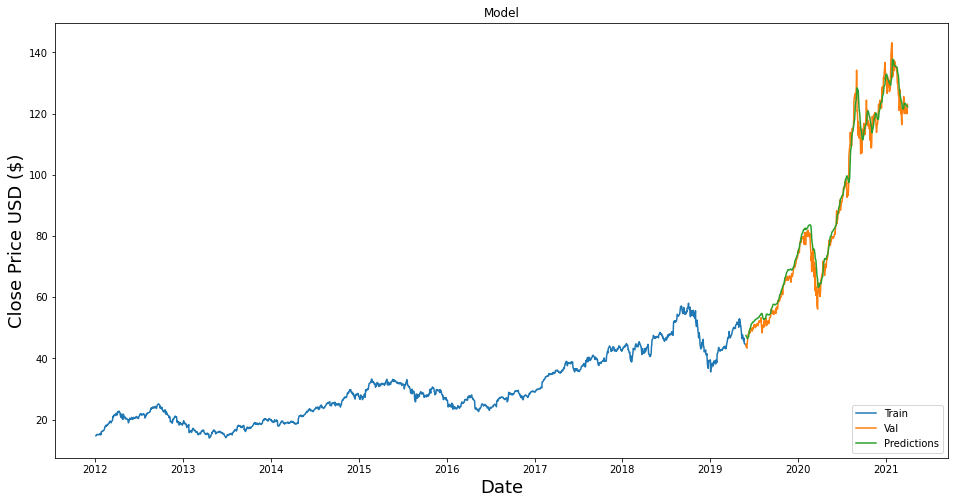

In [36]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualise the model/data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [37]:
#Show the valid and the predicted prices
valid

,Close,Predictions
Date,,
2019-05-30,44.575001,47.501778
2019-05-31,43.767502,47.201759
2019-06-03,43.325001,46.891235
2019-06-04,44.910000,46.561172
2019-06-05,45.634998,46.419861
...,...,...
2021-03-26,121.209999,122.745110
2021-03-29,121.389999,122.542740
2021-03-30,119.900002,122.412506


In [41]:
#Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2021-04-01')
#Create a dataframe 
new_df = apple_quote.filter(['Close'])
#Get the last 60 days closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list 
x_test = []
#Append the past 60 days
x_test.append(last_60_days_scaled)
#Convert the x_test data set to a numpy array
x_test = np.array(x_test)
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape [1], 1))
#Get the predicted scaled price
pred_price = model.predict(x_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[[122.33431]]


In [43]:
#Get the quote
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2012-04-06', end='2021-04-06')
print(apple_quote2['Close'])

Date
2012-04-09     22.722500
2012-04-10     22.444286
2012-04-11     22.364286
2012-04-12     22.241785
2012-04-13     21.615356
                 ...    
2021-03-26    121.209999
2021-03-29    121.389999
2021-03-30    119.900002
2021-03-31    122.150002
2021-04-01    123.000000
Name: Close, Length: 2261, dtype: float64
